# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [3]:
df_periodic_pval = pd.read_csv("data/Cosinor/cosinor_periodic_pval/cosinor_periodic_pval_concat_serie.csv")
df_periodic_qval = pd.read_csv("data/Cosinor/cosinor_periodic_qval/cosinor_periodic_qval_concat_serie.csv")

print(f"After the cosinor analysis, we obtain {len(df_periodic_pval)} significative models based on a p-value threshold")
print(f"After the cosinor analysis, we obtain {len(df_periodic_qval)} significative models based on a q-value threshold")


After the cosinor analysis, we obtain 248849 significative models based on a p-value threshold
After the cosinor analysis, we obtain 228569 significative models based on a q-value threshold


# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [5]:
Range_period = range_period = [20.5, 20.6, 20.7, 20.8, 20.9, 21, 21.1, 21.2, 21.3, 21.4, 21.5, 23.5, 23.6, 23.7, 23.8, 23.9, 24, 24.1, 24.2, 24.3, 24.4, 24.5]
rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])
dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_pval)):
        [name, cond] = df_periodic_pval['test'].iloc[i].split('/')
        if df_periodic_pval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_pval['period'].iloc[i])
        if df_periodic_pval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_pval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period.sort_values(by=['nb_prots_ctrl']))
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_pval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

    Period nb_prots_ctrl nb_prots_nlrp3
21    24.5          8041           3232
20    24.4          8053           3230
19    24.3          8061           3229
18    24.2          8063           3225
17    24.1          8067           3223
16    24.0          8081           3213
15    23.9          8084           3209
14    23.8          8085           3196
13    23.7          8096           3189
12    23.6          8103           3181
11    23.5          8118           3176
10    21.5          8321           3017
9     21.4          8338           3005
8     21.3          8346           2997
7     21.2          8356           2988
6     21.1          8370           2975
5     21.0          8375           2961
4     20.9          8387           2941
3     20.8          8399           2929
2     20.7          8407           2919
1     20.6          8427           2905
0     20.5          8436           2895


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

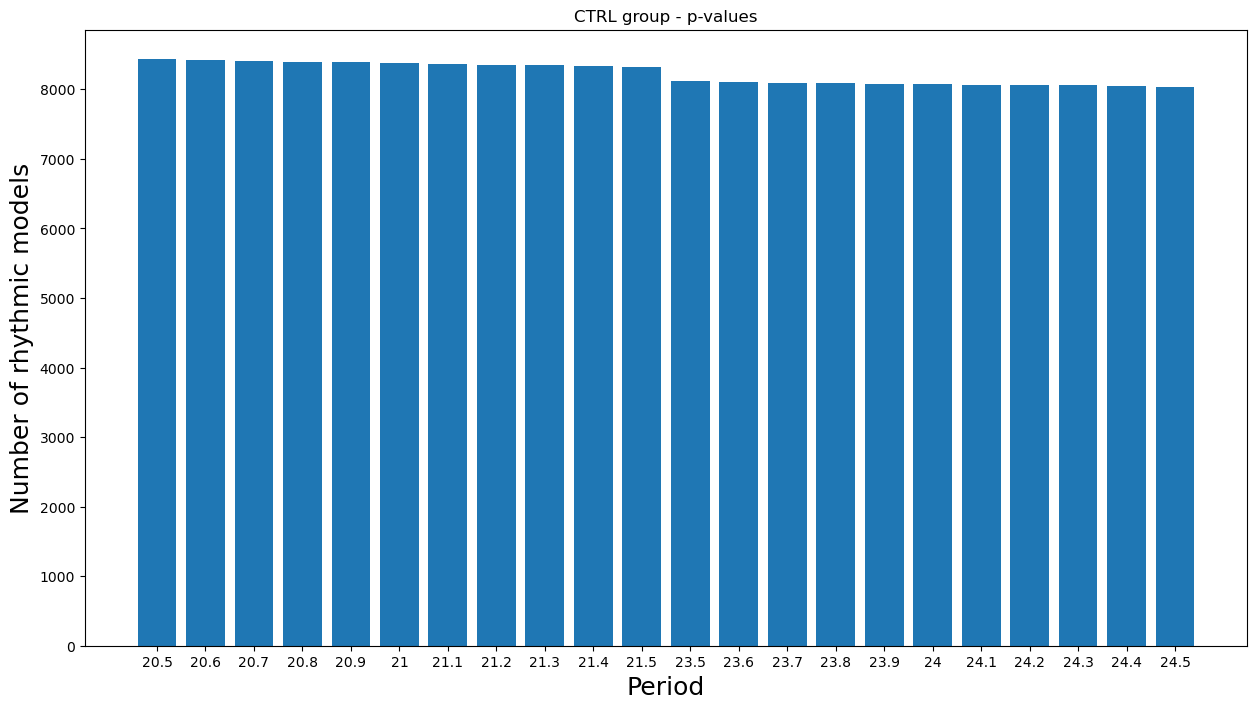

In [7]:
plt.figure(1)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_ctrl
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

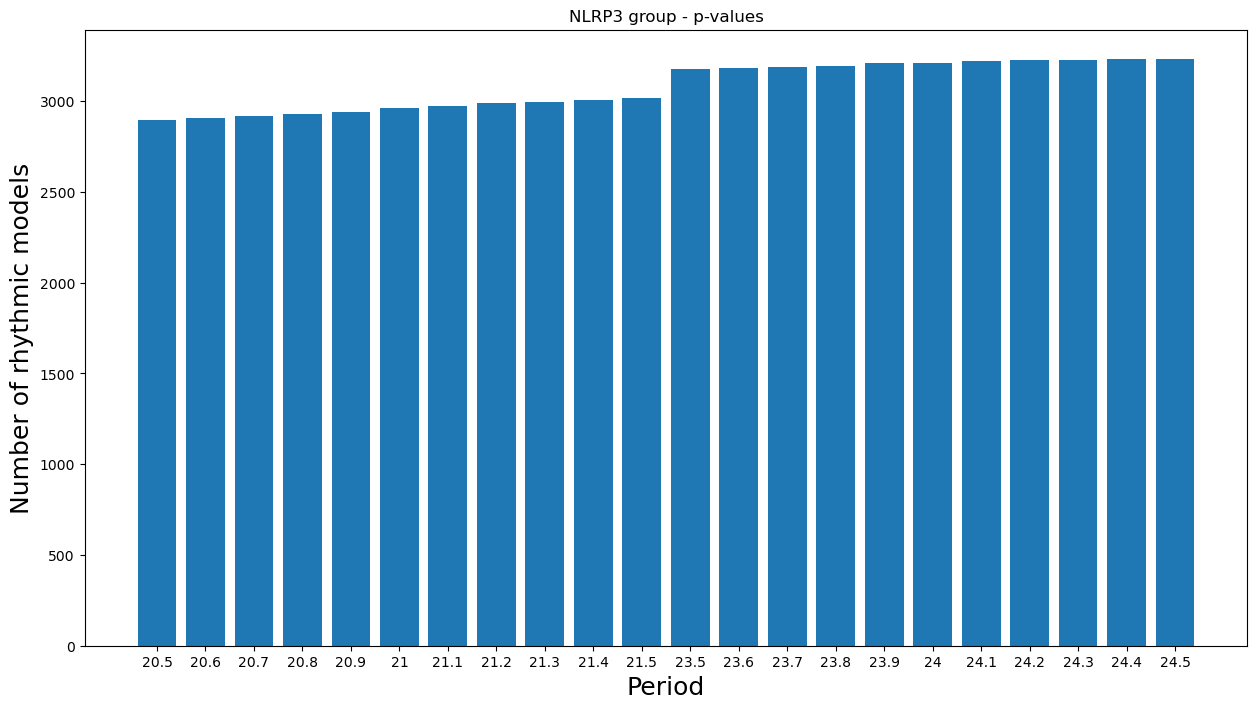

In [8]:
plt.figure(2)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_nlrp3
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [4]:
Range_period = range_period = [20.5, 20.6, 20.7, 20.8, 20.9, 21, 21.1, 21.2, 21.3, 21.4, 21.5, 23.5, 23.6, 23.7, 23.8, 23.9, 24, 24.1, 24.2, 24.3, 24.4, 24.5]

rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])

dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_qval)):
        [name, cond] = df_periodic_qval['test'].iloc[i].split('/')
        if df_periodic_qval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_qval['period'].iloc[i])
        if df_periodic_qval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_qval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period)
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_qval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

    Period nb_prots_ctrl nb_prots_nlrp3
0     20.5          7650           2721
1     20.6          7650           2721
2     20.7          7650           2721
3     20.8          7650           2721
4     20.9          7650           2721
5     21.0          7650           2721
6     21.1          7650           2721
7     21.2          7650           2721
8     21.3          7650           2721
9     21.4          7650           2721
10    21.5          7650           2721
11    23.5          7669           2739
12    23.6          7669           2739
13    23.7          7669           2739
14    23.8          7669           2739
15    23.9          7669           2739
16    24.0          7669           2739
17    24.1          7669           2739
18    24.2          7669           2739
19    24.3          7669           2739
20    24.4          7669           2739
21    24.5          7669           2739


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

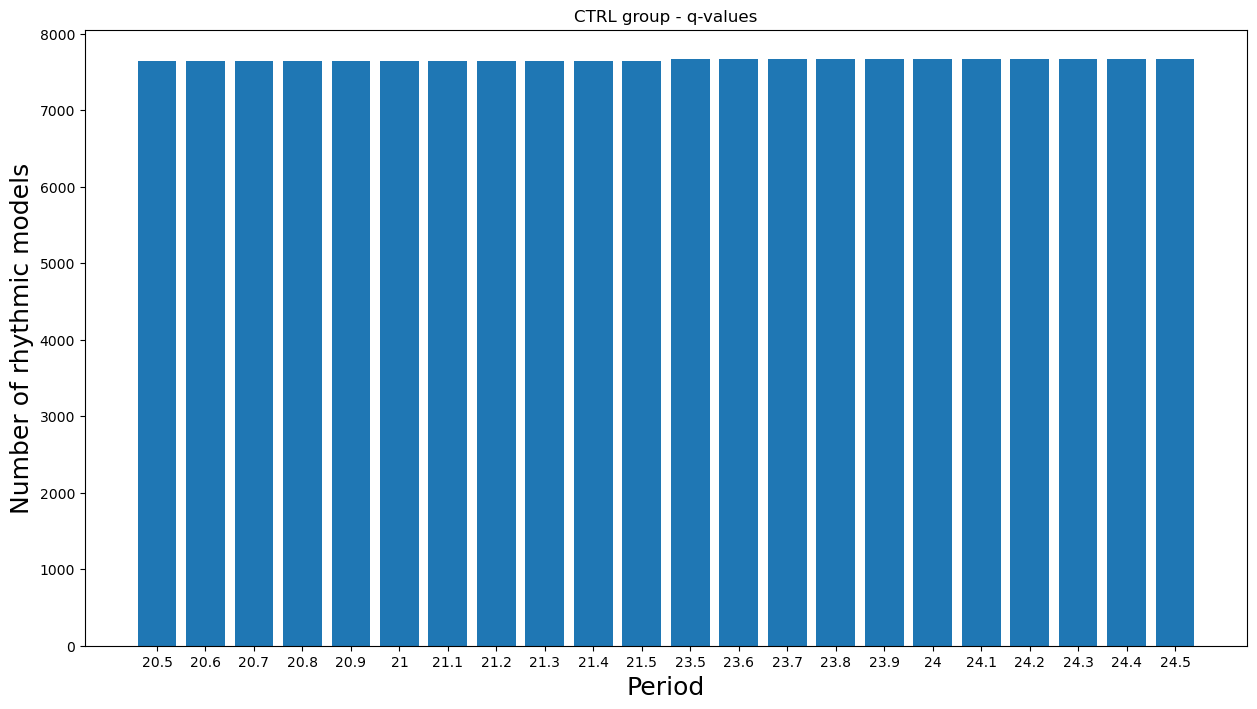

In [10]:
plt.figure(1)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_ctrl
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

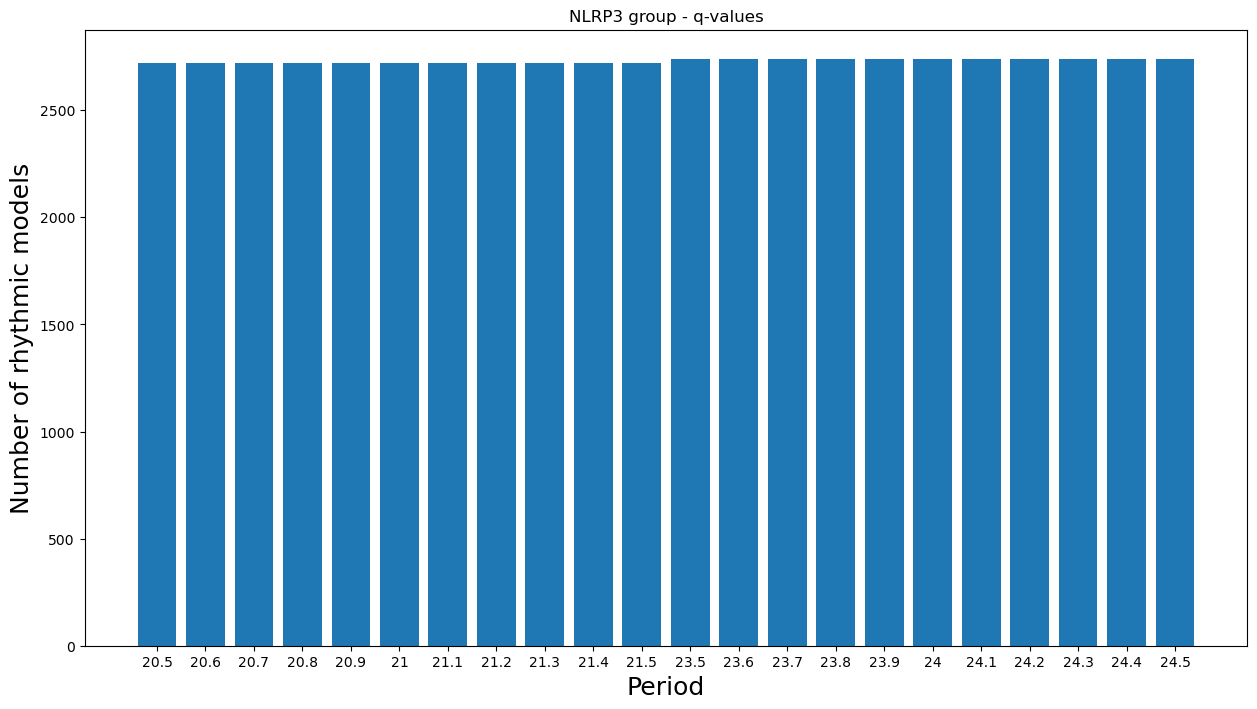

In [11]:
plt.figure(2)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21","21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6", "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_nlrp3
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_rna_seq_cosinor_nlrp3_qval.png', dpi = 300)
